## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools #Python’s Itertool is a module that provides various functions that work on iterators to produce complex iterators. 
#This module works as a fast, memory-efficient tool that is used either by themselves or in combination to form iterator algebra. 


In [2]:
from pyforest import * #lazy solution, because i'll be using alot of variables

## Data Preprocessing

In [3]:
data = pd.read_csv('concrete.csv')
data.head()

<IPython.core.display.Javascript object>

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
data = data.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : "Cement", 
                              'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : "Blast Furnance Slag",
                              'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly Ash',
                              'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
                              'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
                              'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse Aggregate',
                              'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine Aggregate',
                              'Age (day)' : 'Age',
                              'Concrete compressive strength(MPa, megapascals) ' : 'Concrete Strength'
                             })
data.head()

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.dtypes

Cement                 float64
Blast Furnance Slag    float64
Fly Ash                float64
Water                  float64
Superplasticizer       float64
Coarse Aggregate       float64
Fine Aggregate         float64
Age                      int64
Concrete Strength      float64
dtype: object

In [7]:
data.isnull().sum()

Cement                 0
Blast Furnance Slag    0
Fly Ash                0
Water                  0
Superplasticizer       0
Coarse Aggregate       0
Fine Aggregate         0
Age                    0
Concrete Strength      0
dtype: int64

In [8]:
data.shape

(1030, 9)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnance Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory Data Analysis (EDA)

### Cement

In [10]:
from scipy.stats import stats

Q1 = data['Cement'].quantile(0.25)
Q3 = data['Cement'].quantile(0.75)
IQR = Q3-Q1 # Inter-Quantile Range
IQR


157.625

In [11]:
#Defining outlier limits
LowerOutlierLimit = Q1 - (1.5*IQR)
UpperOutlierLimit = Q3 + (1.5*IQR)
print('The Lower Outlier Limit is: {} and the Upper Outlier Limit is: {}'.format(LowerOutlierLimit,UpperOutlierLimit))

The Lower Outlier Limit is: -44.0625 and the Upper Outlier Limit is: 586.4375


In [12]:
#Checking the number of outliers

print('Number of outliers in cement upper: ', data[data['Cement'] > UpperOutlierLimit]['Cement'].count())
print('Number of outliers in cement lower: ', data[data['Cement'] < LowerOutlierLimit]['Cement'].count())
 

    

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cement'>

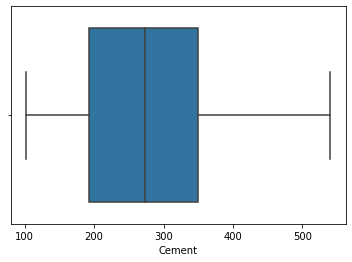

In [13]:
#Verifying using boxplot

sns.boxplot(x = data['Cement'])

<IPython.core.display.Javascript object>

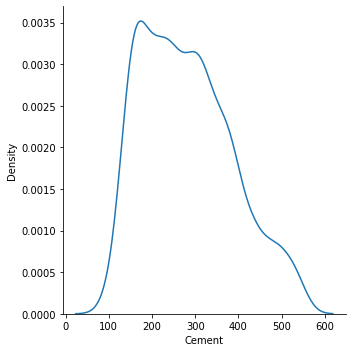

In [14]:
sns.displot(data['Cement'], kind="kde")


No outliers spotted here

### Fly Ash

In [15]:

Q1 = data['Fly Ash'].quantile(0.25)
Q3 = data['Fly Ash'].quantile(0.75)
IQR = Q3-Q1
LowerOutlierLimit = Q1 - (1.5*IQR)
UpperOutlierLimit = Q3 + (1.5*IQR)
print('The Lower Outlier Limit is: {} and the Upper Outlier Limit is: {}'.format(LowerOutlierLimit,UpperOutlierLimit))
print('Number of outliers in cement upper: ', data[data['Fly Ash'] > UpperOutlierLimit]['Fly Ash'].count())
print('Number of outliers in cement lower: ', data[data['Fly Ash'] < LowerOutlierLimit]['Fly Ash'].count())

The Lower Outlier Limit is: -177.45 and the Upper Outlier Limit is: 295.75
Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


No outliers spotted here

### Water

In [16]:
Q1 = data['Water'].quantile(0.25)
Q3 = data['Water'].quantile(0.75)
IQR = Q3-Q1
LowerOutlierLimit = Q1 - (1.5*IQR)
UpperOutlierLimit = Q3 + (1.5*IQR)
print('The Lower Outlier Limit is: {} and the Upper Outlier Limit is: {}'.format(LowerOutlierLimit,UpperOutlierLimit))
print('Number of outliers in cement upper: ', data[data['Water'] > UpperOutlierLimit]['Water'].count())
print('Number of outliers in cement lower: ', data[data['Water'] < LowerOutlierLimit]['Water'].count())

The Lower Outlier Limit is: 124.25000000000001 and the Upper Outlier Limit is: 232.64999999999998
Number of outliers in cement upper:  4
Number of outliers in cement lower:  5


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Water'>

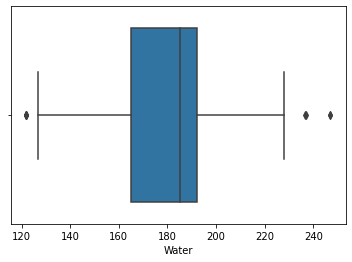

In [17]:
sns.boxplot(x = data['Water'])

In [18]:
# Spotted 9 outliers!

<IPython.core.display.Javascript object>

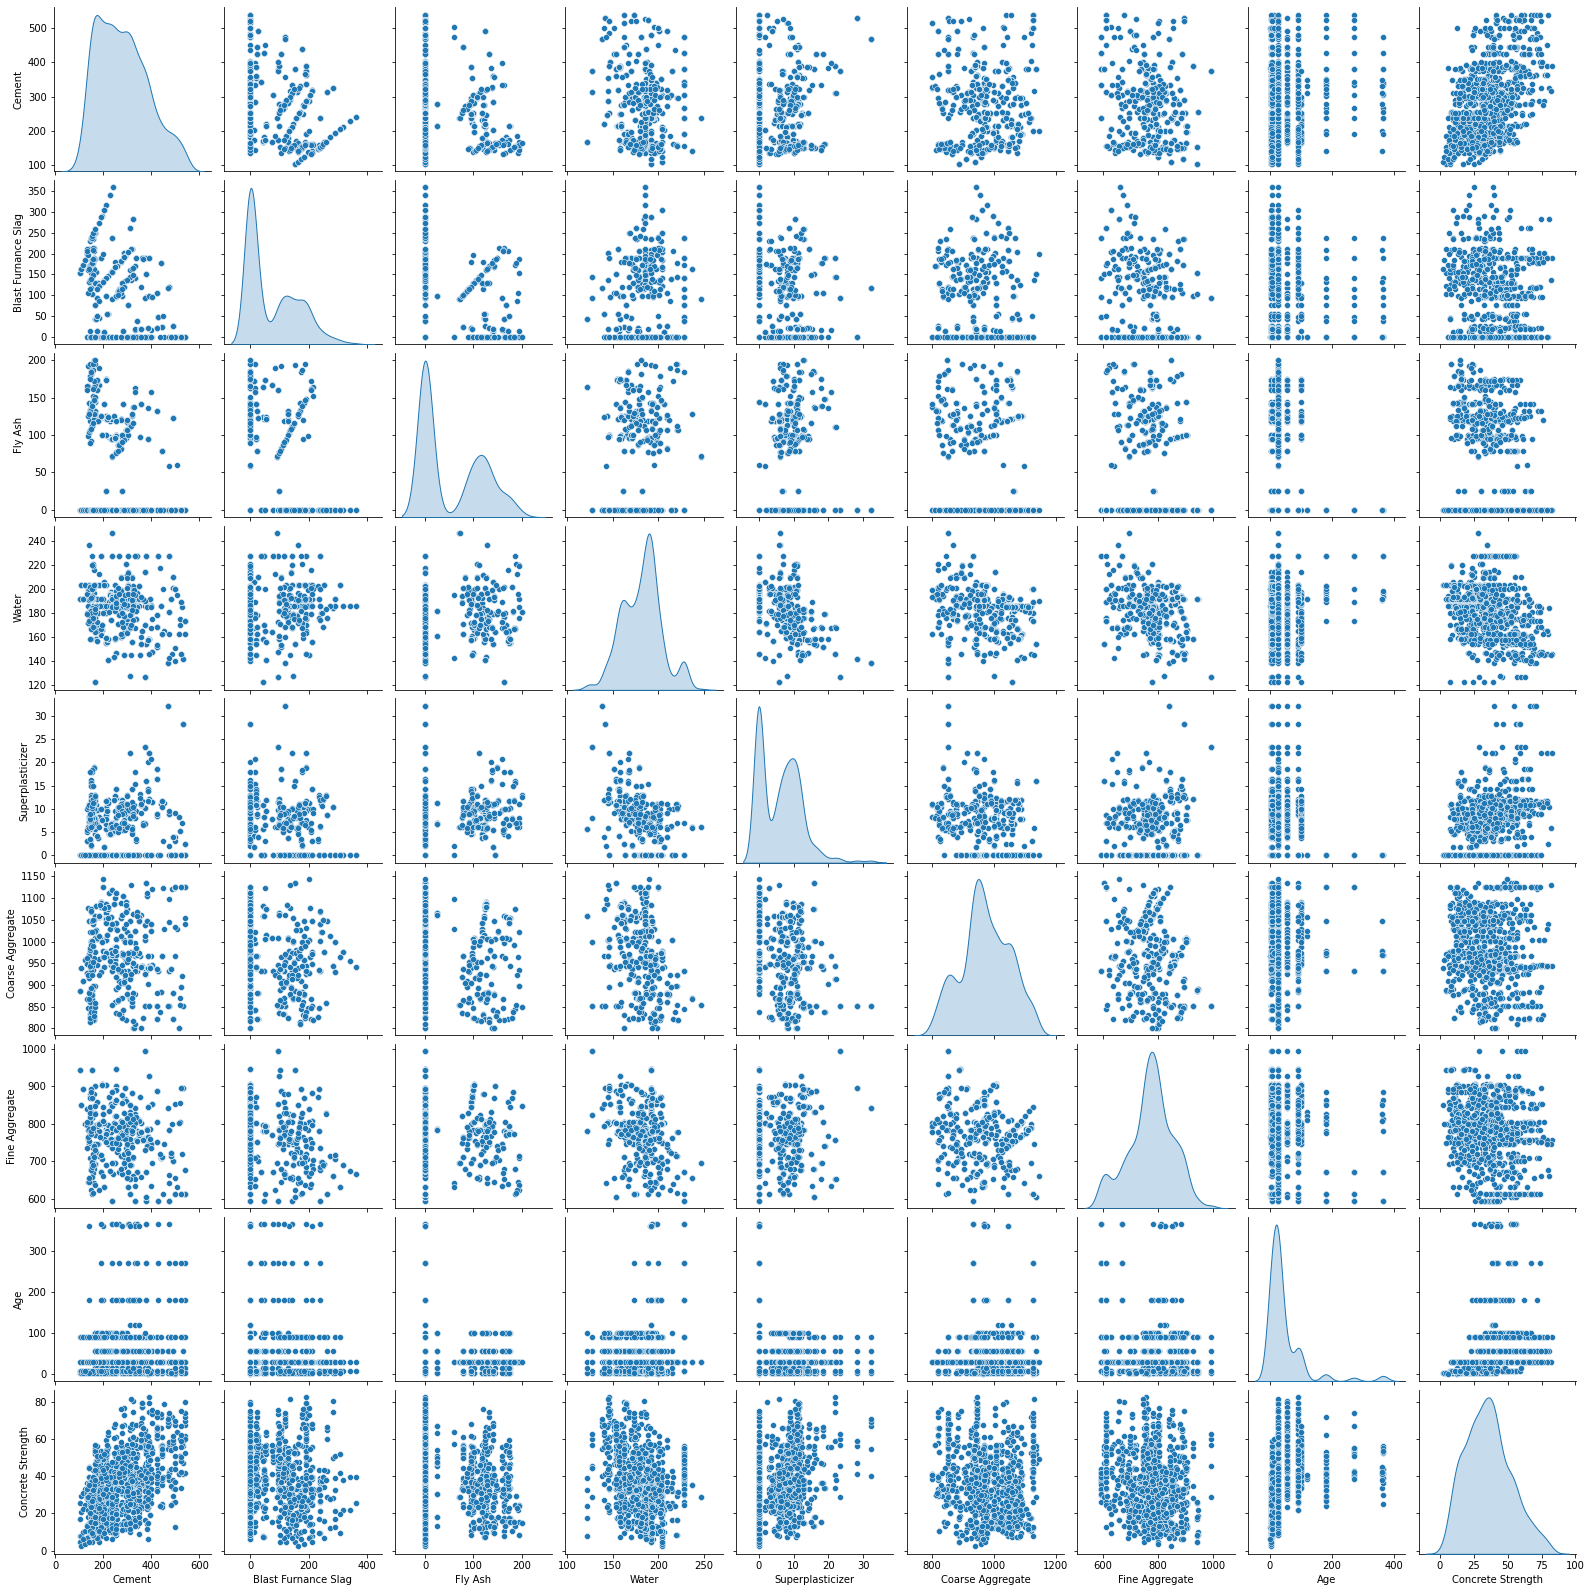

In [19]:
sns.pairplot(data, diag_kind = 'kde') # Just checking the correlation between attributes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

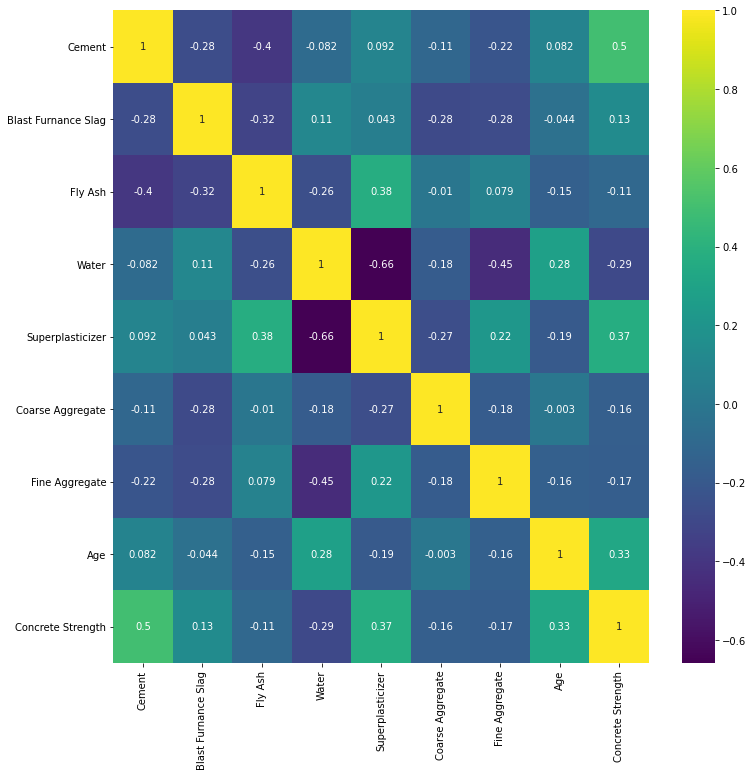

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

### Dealing with the outliers

<AxesSubplot:>

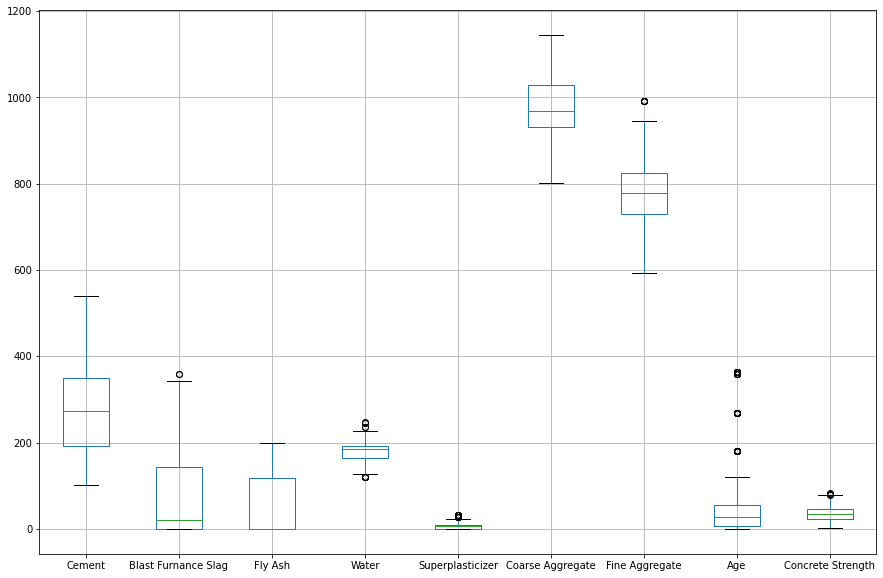

In [21]:
data.boxplot(figsize = (15,10))

<AxesSubplot:>

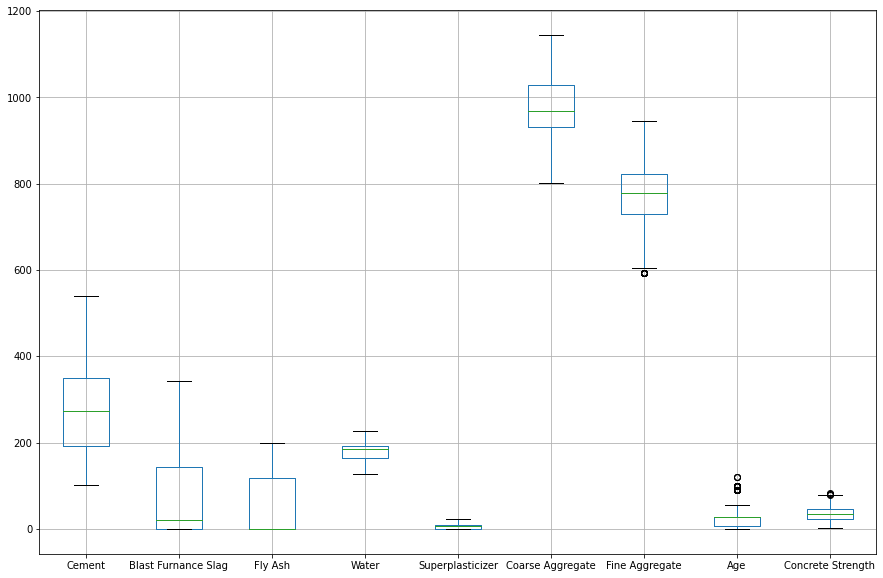

In [22]:
for cols in data.columns[:-1]:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    iqr = Q3 - Q1
    
    low = Q1 - 1.5*iqr
    high = Q3 + 1.5*iqr
    
    data.loc[(data[cols] < low) | (data[cols] > high) , cols] = data[cols].median()
    
data.boxplot(figsize = (15,10))

### We managed to reduce the outliers,but we can't eliminate them all

## Feature Engineering and Model Building

In [26]:
data.head()

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [27]:
X = data.drop('Concrete Strength', axis = 1)
y = data['Concrete Strength']
X.max()

Cement                  540.0
Blast Furnance Slag     342.1
Fly Ash                 200.1
Water                   228.0
Superplasticizer         23.4
Coarse Aggregate       1145.0
Fine Aggregate          945.0
Age                     120.0
dtype: float64

In [28]:
from scipy.stats import zscore #Scaling our data

X = X.apply(zscore)
X = pd.DataFrame(X, columns = X.columns)
X.max()

<IPython.core.display.Javascript object>

Cement                 2.477915
Blast Furnance Slag    3.150340
Fly Ash                2.281084
Water                  2.250592
Superplasticizer       3.183193
Coarse Aggregate       2.214224
Fine Aggregate         2.192258
Age                    3.157360
dtype: float64

In [29]:
X

,Cement,Blast Furnance Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Building Different Models

## 1.Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)
train_score = forest_model.score(X_train,y_train)
print('Accuracy on training data: {}%'.format(train_score*100))

Accuracy on training data: 98.09274573903798%


In [33]:
test_score = forest_model.score(X_test,y_test)
print('Accuracy on test data: {}%'.format(test_score*100))

Accuracy on test data: 87.46021859639865%


In [34]:
prediction = forest_model.predict(X_test)
print('Mean squared error of the Random Forest Model: {}'.format(metrics.mean_squared_error(prediction, y_test)))

<IPython.core.display.Javascript object>

Mean squared error of the Random Forest Model: 32.86766979938474


In [35]:
results = pd.DataFrame(columns = ['Algorithm','Accuracy(%)'], index = [1,2,3,4,5,6,7,8,9,10,11,12])
results.iloc[0,0] = 'Random Forest Regressor'
results.iloc[0,1] = '87.98'
results.replace(np.nan, 'Coming soon...',inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Coming soon...,Coming soon...
3,Coming soon...,Coming soon...
4,Coming soon...,Coming soon...
5,Coming soon...,Coming soon...
6,Coming soon...,Coming soon...
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 2.KFold Cross Validation on Random Forest

In [37]:
k = 20 #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds
kfold = KFold(n_splits = k, random_state = 50, shuffle = True)
K_results = cross_val_score(forest_model,X,y, cv = kfold)
accuracy = np.mean(abs(K_results))
print('Accuracy after applying KFold Cross Validation on Random Forest Model: {}%'.format(accuracy * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy after applying KFold Cross Validation on Random Forest Model: 91.07384248970035%


In [38]:
results.iloc[1,0] = 'Random Forest Regressor KFold'
results.iloc[1,1] = 91.04
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Coming soon...,Coming soon...
4,Coming soon...,Coming soon...
5,Coming soon...,Coming soon...
6,Coming soon...,Coming soon...
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 3.Gradient Boosting Regressor

In [39]:
gradient = GradientBoostingRegressor()

<IPython.core.display.Javascript object>

In [40]:
gradient.fit(X_train,y_train)
test_score = gradient.score(X_test,y_test)
print('Accuracy on test data: {}%'.format(test_score*100))

Accuracy on test data: 88.00646269229874%


In [41]:
results.iloc[2,0] = 'Gradient Boost Regressor'
results.iloc[2,1] = 88.01
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Coming soon...,Coming soon...
5,Coming soon...,Coming soon...
6,Coming soon...,Coming soon...
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 4.K-Fold Cross Validation on Gradient Boosting

In [42]:
k = 20
kfold = KFold(n_splits = k, random_state = 50, shuffle = True)
K_results = cross_val_score(gradient,X,y, cv = kfold)
accuracy = np.mean(abs(K_results))
print('Accuracy after applying KFold Cross Validation on Gradient Bossting Regressor Model: {}%'.format(accuracy * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy after applying KFold Cross Validation on Gradient Bossting Regressor Model: 89.88722430873999%


In [43]:
results.iloc[3,0] = 'Gradient Boost Regressor KFold'
results.iloc[3,1] = 89.85
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,Coming soon...,Coming soon...
6,Coming soon...,Coming soon...
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 5. AdaBoost Regressor

In [44]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
print('Accuracy of AdaBoost Regressor: {}%'.format(ada.score(X_test,y_test) * 100))

Accuracy of AdaBoost Regressor: 77.32748218424778%


In [45]:
results.iloc[4,0] = 'AdaBoost Regressor '
results.iloc[4,1] = 76.37
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,Coming soon...,Coming soon...
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 6.AdaBoost Regressor KFold

In [46]:
k = 20
KF = KFold(k, random_state = 70, shuffle = True)
accuracies = cross_val_score(ada,X,y, cv = KF)
a = accuracies.mean()
print('Accuracy of AdaBoost Regressor KFold: {}%'.format(a * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy of AdaBoost Regressor KFold: 78.42214247365484%


In [47]:
results.iloc[5,0] = 'AdaBoost Regressor KFold'
results.iloc[5,1] = 78.24
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,Coming soon...,Coming soon...
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 7. KNN Regressor

In [48]:
K_list = []

from sklearn.neighbors import KNeighborsRegressor

for i in range(1,50):
    K_model = KNeighborsRegressor(n_neighbors = i)
    K_model.fit(X_train,y_train)
    predictions = K_model.predict(X_test)
    K_list.append(np.mean(predictions != y_test))
K_list    
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.8996763754045307,
 0.9902912621359223,
 0.9967637540453075,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Accuracy')

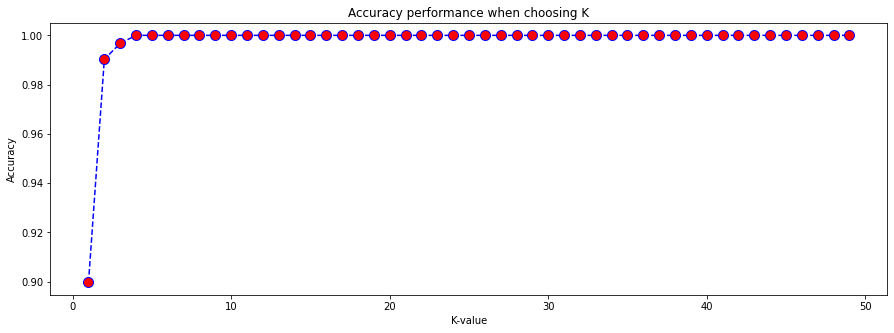

In [49]:
plt.figure(figsize = (15,5))
plt.plot(range(1,50), K_list, color = 'blue',linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy performance when choosing K')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [50]:
#We are going to select K = 4

KNN = KNeighborsRegressor(n_neighbors = 4)
KNN.fit(X_train,y_train)
print('Accuracy of KNN model: {}%'.format(KNN.score(X_test,y_test) * 100))

Accuracy of KNN model: 75.11661586300369%


In [51]:
results.iloc[6,0] = 'KNN Regressor '
results.iloc[6,1] = 75.11
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,Coming soon...,Coming soon...
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 8.KNN Regressor KFold

In [52]:
k = 20
KF = KFold(k, random_state = 70, shuffle = True)
accuracies = cross_val_score(KNN,X,y, cv = KF)
a = accuracies.mean()
print('Accuracy of AdaBoost Regressor KFold: {}%'.format(a * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy of AdaBoost Regressor KFold: 79.50274141542299%


In [53]:
results.iloc[7,0] = 'KNN Regressor K Fold '
results.iloc[7,1] = 79.50
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Coming soon...,Coming soon...
10,Coming soon...,Coming soon...


## 9.Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
print("Accuracy of decision tree is: {}%".format(tree.score(X_test,y_test) * 100))

Accuracy of decision tree is: 76.91767401828984%


In [56]:
results.iloc[8,0] = 'Decision Tree Regressor '
results.iloc[8,1] = 76.97
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Decision Tree Regressor,76.97
10,Coming soon...,Coming soon...


## 10.Decision Tree Regression KFold

In [57]:
k = 20
KF = KFold(k)
scores = cross_val_score(tree,X,y, cv = k)
b = accuracy.mean()
print('Accuracy of Decision Tree Regressor KFold: {}%'.format(b * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy of Decision Tree Regressor KFold: 89.88722430873999%


In [58]:
results.iloc[9,0] = 'Decision Tree Regressor KFold '
results.iloc[9,1] = 56.53
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Decision Tree Regressor,76.97
10,Decision Tree Regressor KFold,56.53


## Let's remove the unimportant features

In [59]:
importances = pd.DataFrame(tree.feature_importances_, columns = ['Importance'], index = X_train.columns)
importances

<IPython.core.display.Javascript object>

,Importance
Cement,0.309750
Blast Furnance Slag,0.059331
Fly Ash,0.009058
Water,0.121941
Superplasticizer,0.050783
Coarse Aggregate,0.026203
Fine Aggregate,0.049942
Age,0.372993


In [60]:
data2 =data.drop(columns = ['Superplasticizer','Coarse Aggregate','Fly Ash','Fine Aggregate'], axis = 1)
data2.head()

,Cement,Blast Furnance Slag,Water,Age,Concrete Strength
0,540.0,0.0,162.0,28.0,79.99
1,540.0,0.0,162.0,28.0,61.89
2,332.5,142.5,228.0,28.0,40.27
3,332.5,142.5,228.0,28.0,41.05
4,198.6,132.4,192.0,28.0,44.30


In [61]:
X = data2.drop('Concrete Strength', axis = 1)
y = data2['Concrete Strength']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [63]:
X_train.apply(zscore)
X_test.apply(zscore)

,Cement,Blast Furnance Slag,Water,Age
339,0.139490,-0.902918,-0.334336,-1.065575
244,-0.424332,-0.902918,0.217329,-1.065575
882,-1.360220,0.569924,0.833896,-0.119635
567,-0.754421,0.599824,0.170971,-0.914225
923,-1.150337,1.389400,1.575631,-0.119635
...,...,...,...,...
1018,0.370361,-0.902918,0.022624,-0.119635
1015,0.380855,0.742679,0.175607,-0.119635
341,0.139490,-0.902918,-0.334336,-0.119635
750,2.074230,-0.902918,0.833896,-0.119635


In [64]:
new_tree = DecisionTreeRegressor()
new_tree.fit(X_train,y_train)
print('The accuracy of the Decision Tree after removing unimportant features: {}%'.format(new_tree.score(X_test,y_test)))

The accuracy of the Decision Tree after removing unimportant features: 0.8135777452336841%


In [65]:
results.iloc[10,0] = 'Decision Tree Regressor Feature Removal '
results.iloc[10,1] = 81.64
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Decision Tree Regressor,76.97
10,Decision Tree Regressor KFold,56.53


### Let's try some hyperparameter tuning

In [76]:
X = data.drop('Concrete Strength',axis = 1)
y = data['Concrete Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
TunedTree = DecisionTreeRegressor(max_depth = 4, random_state = 1,min_samples_leaf = 5)
TunedTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [77]:
print("Accuracy of Decision Tree after tuning: {}%".format(TunedTree.score(X_test,y_test)))

Accuracy of Decision Tree after tuning: 0.556820999525816%


In [82]:
results.iloc[11,0] = 'Decision Tree Regressor Hyperparameter Tuning '
results.iloc[11,1] = 55.68
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Decision Tree Regressor,76.97
10,Decision Tree Regressor KFold,56.53


## Visual Represenation

In [79]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [80]:
ScaledFeatures = data.drop('Concrete Strength', axis = 1).apply(zscore)
FeatureColumns = ScaledFeatures.columns

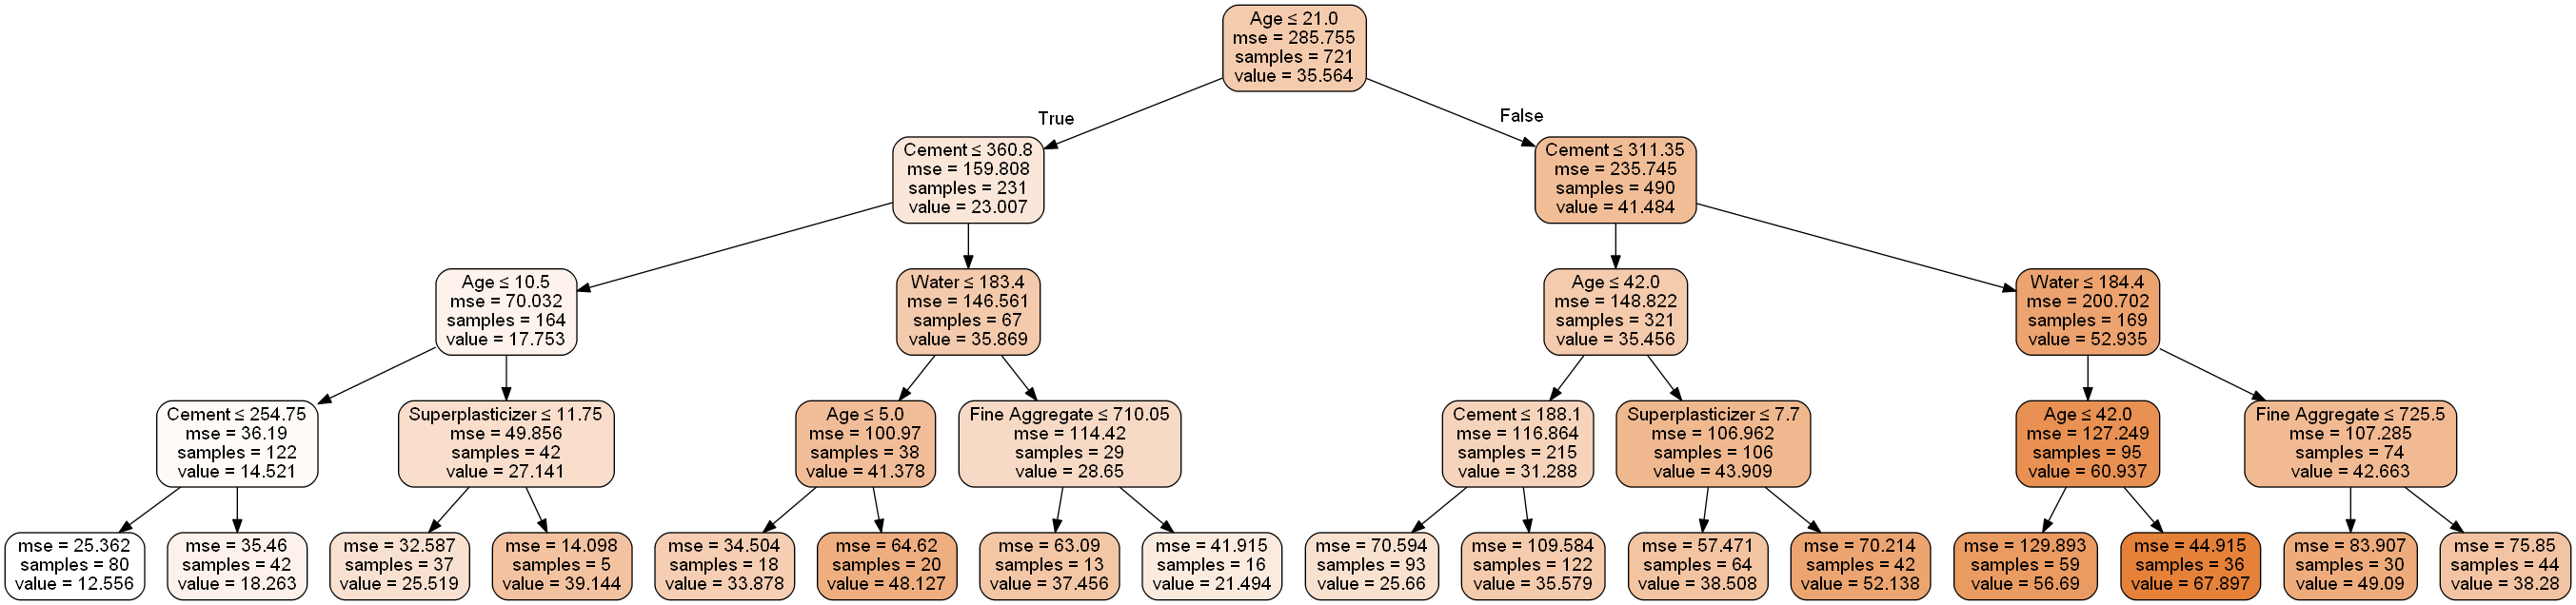

In [81]:
dot_data = StringIO()
export_graphviz(TunedTree, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = FeatureColumns, class_names = ['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Concrete.png')
Image(graph.create_png())

## Conclusion

In [83]:
results

,Algorithm,Accuracy(%)
1,Random Forest Regressor,87.98
2,Random Forest Regressor KFold,91.04
3,Gradient Boost Regressor,88.01
4,Gradient Boost Regressor KFold,89.85
5,AdaBoost Regressor,76.37
6,AdaBoost Regressor KFold,78.24
7,KNN Regressor,75.11
8,KNN Regressor K Fold,79.5
9,Decision Tree Regressor,76.97
10,Decision Tree Regressor KFold,56.53


## It looks like the most succesful model is the Random Forest Regressor after using KFold Cross-Fold Validation